In [ ]:
# Импорт данных и первичный анализ по кластеризации
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("Mall_Customers_Segmentation.csv")

In [ ]:
print(data.head())
print(data.info())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)    Income  \
0           1 -1.424569                  15               -0.434801 -1.738999   
1           2 -1.281035                  15                1.195704 -1.738999   
2           3 -1.352802                  16               -1.715913 -1.700830   
3           4 -1.137502                  16                1.040418 -1.700830   
4           5 -0.563369                  17               -0.395980 -1.662660   

   Genre_Male_1_1       PC1       PC2  Cluster  
0               1 -2.345894 -0.425142        7  
1               1 -2.323725 -1.445994        7  
2               0 -2.467980  0.028252        4  
3               0 -2.430020 -1.716271        2  
4               0 -2.408095 -0.335022        4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cust

In [ ]:
print(data.isnull().sum())

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Income                    0
Genre_Male_1_1            0
PC1                       0
PC2                       0
Cluster                   0
dtype: int64


In [ ]:
print(data.dtypes)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Income                  200 non-null    float64
 5   Genre_Male              200 non-null    uint8  
dtypes: float64(3), int64(2), uint8(1)
memory usage: 8.1 KB
None


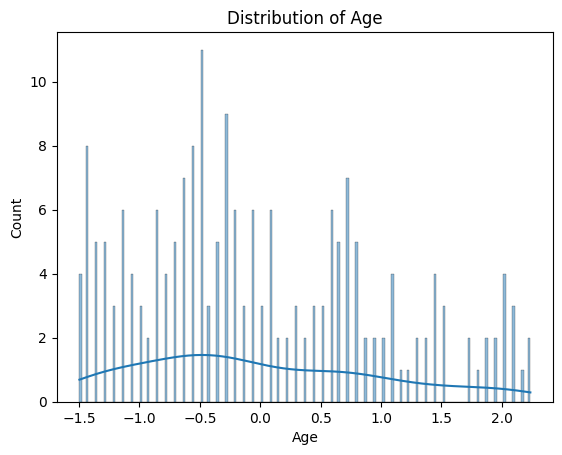

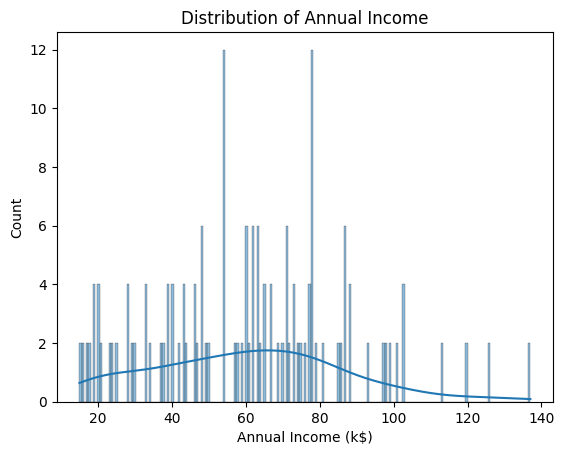

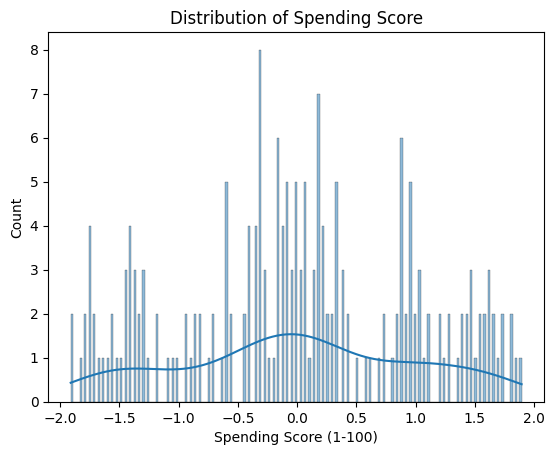

In [ ]:
#Аддиктивный анализ
if 'Genre' in data.columns:
    data['Genre'] = data['Genre'].str.lower() #помещаю в нижний регистр тк у меня он не мог определиться никак
    sns.countplot(x='Genre', data=data)
    plt.title('Distribution of Genre')
    plt.show()

sns.histplot(data['Age'], bins=201, kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(data['Annual Income (k$)'], bins=201, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

sns.histplot(data['Spending Score (1-100)'], bins=201, kde=True)
plt.title('Distribution of Spending Score')
plt.show()

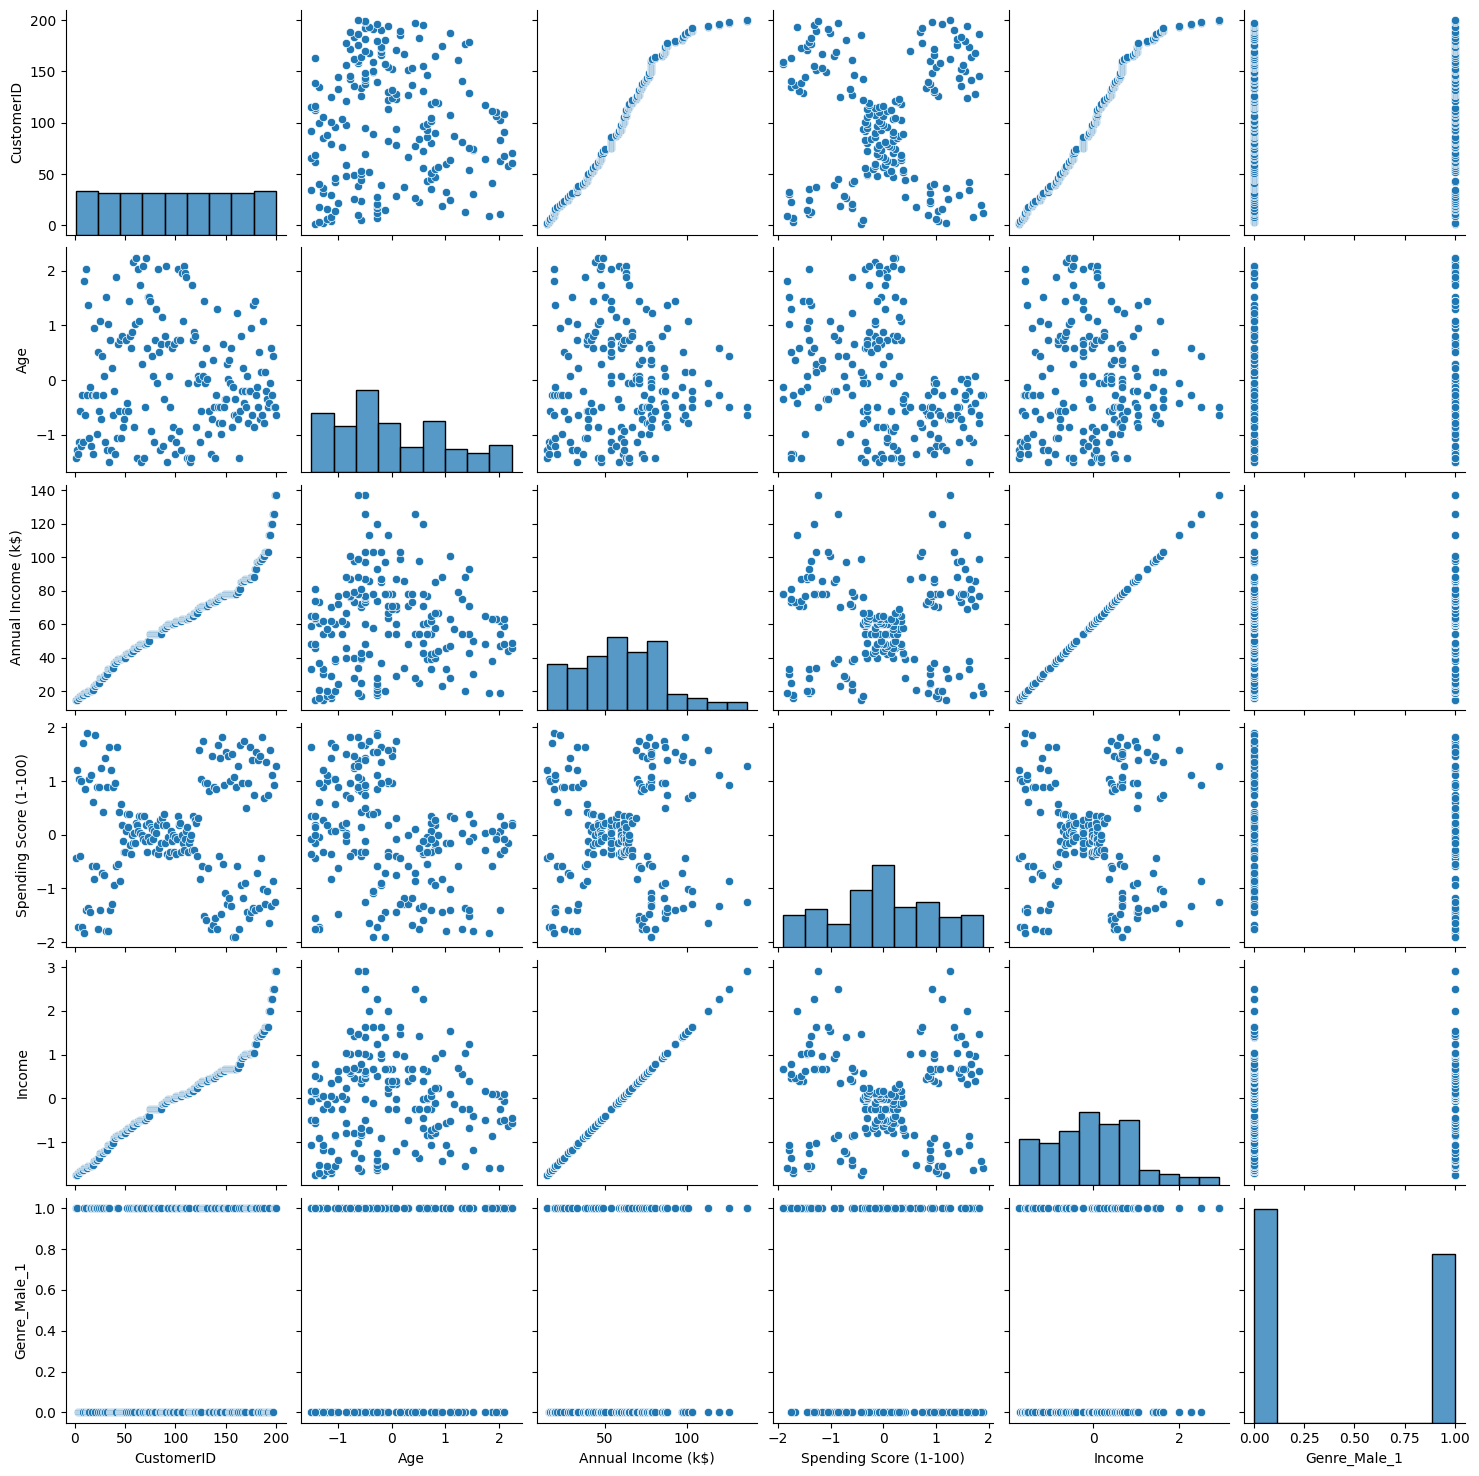

In [ ]:
sns.pairplot(data)
plt.show()
#создание и вывод графиков. я так понял это 1 и 2 задание

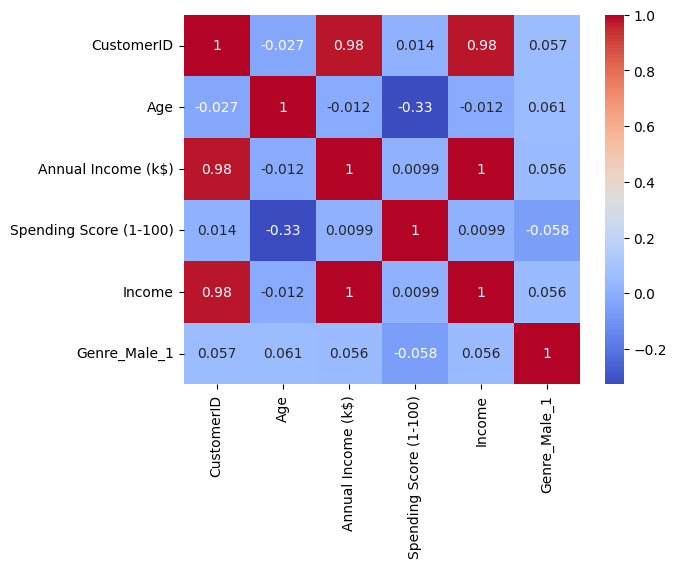

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)    Income  \
0           1 -1.424569                  15               -0.434801 -1.738999   
1           2 -1.281035                  15                1.195704 -1.738999   
2           3 -1.352802                  16               -1.715913 -1.700830   
3           4 -1.137502                  16                1.040418 -1.700830   
4           5 -0.563369                  17               -0.395980 -1.662660   

   Genre_Male_1  
0             1  
1             1  
2             0  
3             0  
4             0  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Income                  200 non-null    float64
 5   Genre_Male_1            200 non-null    uint8  
dtypes: float64(3), int64(2), uint8(1)
memory usage: 8.1 KB
None


In [ ]:
print(data.columns)

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income', 'Genre_Male_1_1'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
data['Genre_Male_1_1'] = label_encoder.fit_transform(data['Genre_Male_1_1'])
data['Genre_Male_1_1'] = data['Genre_Male_1_1']

In [ ]:
print(data.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)    Income  \
0           1 -1.424569                  15               -0.434801 -1.738999   
1           2 -1.281035                  15                1.195704 -1.738999   
2           3 -1.352802                  16               -1.715913 -1.700830   
3           4 -1.137502                  16                1.040418 -1.700830   
4           5 -0.563369                  17               -0.395980 -1.662660   

   Genre_Male_1_1  
0               1  
1               1  
2               0  
3               0  
4               0  


In [ ]:
label_encoder = LabelEncoder()
data['Genre_Male_1_1'] = label_encoder.fit_transform(data['Genre_Male_1_1'])

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    float64
 4   Income                  200 non-null    float64
 5   Genre_Male_1_1          200 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.5 KB
None


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('CustomerID', axis=1))

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
possible_clusters = range(2, 11)

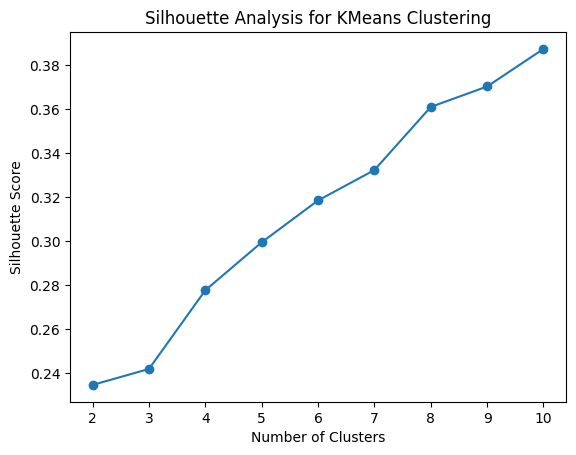

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores_agglo = []
for n_clusters in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglo.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores_agglo.append(silhouette_avg)

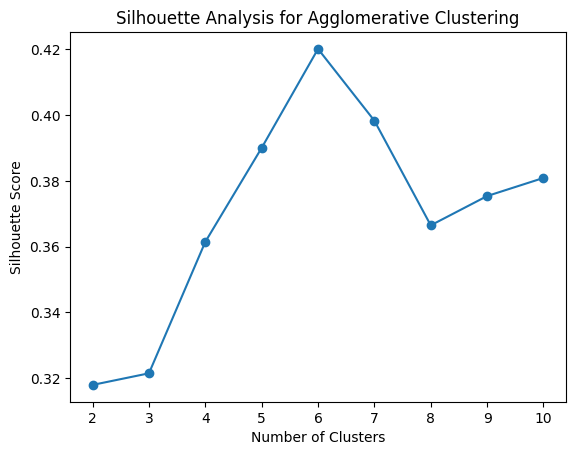

In [ ]:
plt.plot(range(2, 11), silhouette_scores_agglo, marker='o')
plt.title('Silhouette Analysis for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_clusters = possible_clusters[silhouette_scores.index(max(silhouette_scores))]

In [ ]:
print(data.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)    Income  \
0           1 -1.424569                  15               -0.434801 -1.738999   
1           2 -1.281035                  15                1.195704 -1.738999   
2           3 -1.352802                  16               -1.715913 -1.700830   
3           4 -1.137502                  16                1.040418 -1.700830   
4           5 -0.563369                  17               -0.395980 -1.662660   

   Genre_Male_1_1       PC1       PC2  Cluster  
0               1 -2.345894 -0.425142        7  
1               1 -2.323725 -1.445994        7  
2               0 -2.467980  0.028252        4  
3               0 -2.430020 -1.716271        2  
4               0 -2.408095 -0.335022        4  


In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=100)
data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


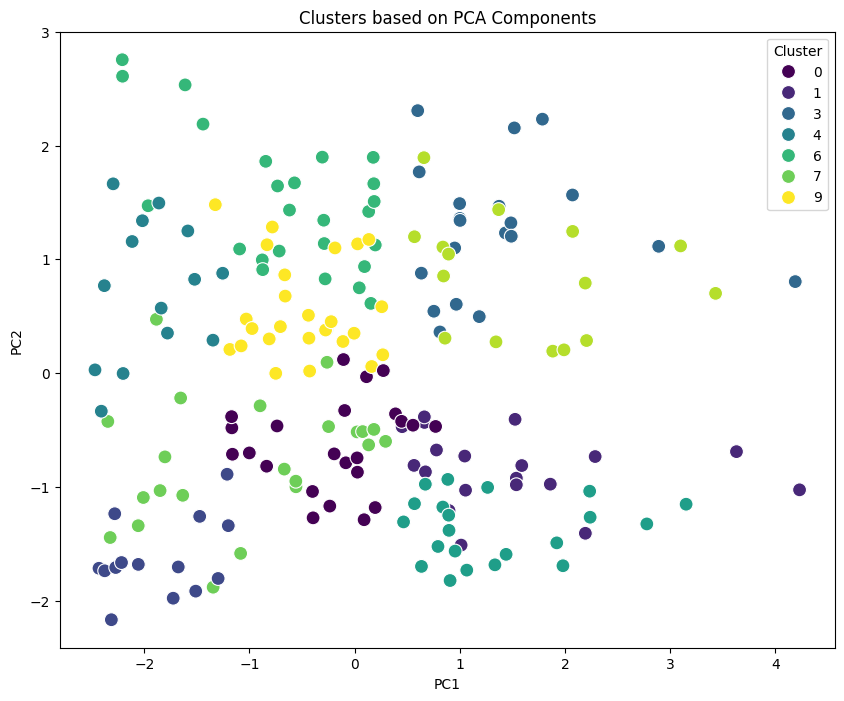

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Clusters based on PCA Components')
plt.show()

In [ ]:
print(data.head())

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)    Income  \
0           1 -1.424569                  15               -0.434801 -1.738999   
1           2 -1.281035                  15                1.195704 -1.738999   
2           3 -1.352802                  16               -1.715913 -1.700830   
3           4 -1.137502                  16                1.040418 -1.700830   
4           5 -0.563369                  17               -0.395980 -1.662660   

   Genre_Male_1_1       PC1       PC2  Cluster  
0               1 -2.345894 -0.425142        7  
1               1 -2.323725 -1.445994        7  
2               0 -2.467980  0.028252        4  
3               0 -2.430020 -1.716271        2  
4               0 -2.408095 -0.335022        4  


In [ ]:
cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                     
0         94.416667 -0.790630           58.125000               -0.142022   
1        158.368421 -0.423612           86.052632                1.205920   
2         24.285714 -0.932454           26.642857                1.123607   
3        159.500000  0.046648           85.150000               -1.403399   
4         22.857143  0.169677           26.071429               -1.166865   
5        163.333333 -0.477932           86.047619                1.221585   
6         69.692308  1.382613           48.038462               -0.346706   
7         52.136364 -1.029852           39.500000                0.447507   
8        171.000000  0.412658           92.333333               -1.110297   
9         80.840000  1.093007           53.240000               -0.026399   

           Income  Genre_Male_1_1       PC1       PC2  
Cluster            

**кластер 0**  - Низкий средний возраст, средний годовой доход, низкая оценка расходов.
Тип клиентов: Молодежь среднего класса с умеренными расходами.
Факторы, объясняющие различия: Возможно, эти клиенты предпочитают экономить и имеют средний уровень дохода.

**кластер 1** - Средний возраст, высокий годовой доход, высокая оценка расходов.
Тип клиентов: Клиенты среднего возраста с высоким уровнем дохода и склонностью к высоким расходам.
Факторы, объясняющие различия: Эта группа представляет более состоятельных клиентов, склонных тратить больше.

**кластер 2 **- Низкий средний возраст, низкий годовой доход, высокая оценка расходов.
Тип клиентов: Молодежь с низким уровнем дохода, но с высокими расходами.
Факторы, объясняющие различия: Эти клиенты, возможно, предпочитают тратить больше, несмотря на низкий доход.

Клиентская база разделена на несколько кластеров с различными характеристиками.
Кластеры представляют различные группы клиентов с уникальными предпочтениями и уровнями дохода.

**РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА**
1)*Разрабататывать персонализированные маркетинговые стратегии для каждого кластера*

2)*Оптимизация ассортимента товаров или услуг в соответствии с предпочтениями каждого кластера*

3)*Адаптация уровеня обслуживания в зависимости от характеристик каждого кластера *

**САМОЕ ВАЖНОЕ** /t

4)*Регулярно мониторить и анализировать изменения в структуре клиентской базы. Это поможет вовремя чекать изменения в потребительском поведении и менять бизнес-стратегии.*